# EUROPEAN UNION (28) - Correlation Study


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [58]:
file_historic_var1 = pd.read_csv("./big-data/06_MILESTONES/european_dataset_1.csv")
file_historic_var2 = pd.read_csv("./big-data/06_MILESTONES/european_dataset_2.csv")
emi_factor = pd.read_csv("./big-data/06_MILESTONES/fossil_fuel_emi_factors_normal_param.csv")

file_historic_var1.head()


,years,pop,gdp,coal_emi,oil_emi,gas_emi,fossil_emi,coal_cons,oil_cons,gas_cons,fossil_cons,total_cons
0,1990,475187711,1.182501e+13,1768,1594,644,4006,446.0,630.6,297.0,1373.6,1568.030836
1,1991,476842235,1.201138e+13,1688,1622,671,3981,425.4,635.6,306.7,1367.7,1570.842801
2,1992,477925130,1.213377e+13,1579,1618,649,3846,396.4,630.2,298.0,1324.6,1529.396346
3,1993,479561788,1.210684e+13,1491,1610,673,3774,372.8,630.0,309.5,1312.3,1536.709848
4,1994,480893003,1.244321e+13,1463,1601,683,3747,363.2,639.3,309.2,1311.7,1527.437314


In [3]:
file_historic_var2.head()

,years,gdp_cap,ci_coal,ci_oil,ci_gas,ci_fossil,ci_total,ei_fossil,ei_total
0,1990,24884.930432,3.964126,2.527751,2.168350,2.916424,2.554797,1.161605e-10,1.326029e-10
1,1991,25189.415445,3.968030,2.551919,2.187806,2.910726,2.534308,1.138670e-10,1.307796e-10
2,1992,25388.424353,3.983350,2.567439,2.177852,2.903518,2.514718,1.091664e-10,1.260447e-10
3,1993,25245.631341,3.999464,2.555556,2.174475,2.875867,2.455896,1.083933e-10,1.269291e-10
4,1994,25875.206550,4.028084,2.504302,2.208926,2.856598,2.453128,1.054150e-10,1.227527e-10


# Normalization of the variables

In [12]:

pop_min = np.amin(file_historic_var1["pop"])
pop_max = np.amax(file_historic_var1["pop"])
pop = (file_historic_var1["pop"] - pop_min)/(pop_max - pop_min)

gdp_min = np.amin(file_historic_var1["gdp"])
gdp_max = np.amax(file_historic_var1["gdp"])
gdp = (file_historic_var1["gdp"] - gdp_min)/(gdp_max - gdp_min)

total_cons_min = np.amin(file_historic_var1["total_cons"])
total_cons_max = np.amax(file_historic_var1["total_cons"])
total_cons = (file_historic_var1["total_cons"] - total_cons_min)/(total_cons_max - total_cons_min)

ci_total_min = np.amin(file_historic_var2["ci_total"])
ci_total_max = np.amax(file_historic_var2["ci_total"])
ci_total = (file_historic_var2["ci_total"] - ci_total_min)/(ci_total_max - ci_total_min)


# Joint plots of the variables

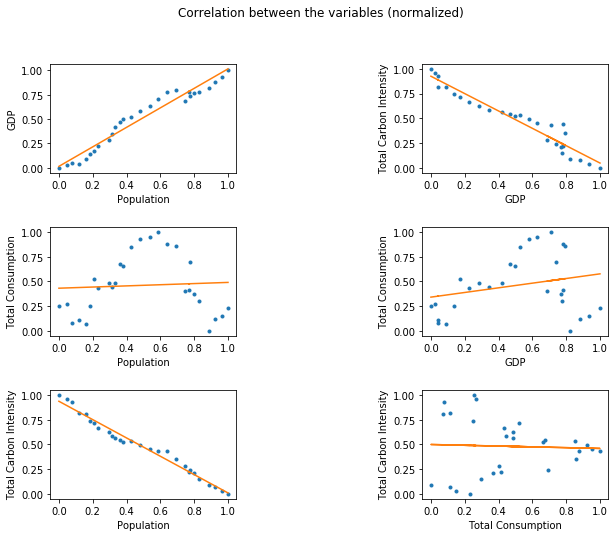

In [55]:

fig = plt.figure(figsize=(10,8))


m, b = np.polyfit(pop, gdp, 1)
line = list()
for i in pop:
    line.append(i*m + b)

plt.subplot(321)
plt.plot(pop, gdp, '.', pop, line, '-')
plt.ylabel("GDP")
plt.xlabel("Population")


m, b = np.polyfit(pop, total_cons, 1)
line = list()
for i in pop:
    line.append(i*m + b)
    
plt.subplot(323)
plt.plot(pop, total_cons,'.', pop, line, '-')
plt.ylabel("Total Consumption")
plt.xlabel("Population")


m, b = np.polyfit(gdp, ci_total, 1)
line = list()
for i in gdp:
    line.append(i*m + b)
    
plt.subplot(322)
plt.plot(gdp, ci_total,'.', gdp, line, '-')
plt.ylabel("Total Carbon Intensity")
plt.xlabel("GDP")


m, b = np.polyfit(gdp, total_cons, 1)
line = list()
for i in gdp:
    line.append(i*m + b)
    
plt.subplot(324)
plt.plot(gdp, total_cons,'.', gdp, line, '-')
plt.ylabel("Total Consumption")
plt.xlabel("GDP")


m, b = np.polyfit(pop, ci_total, 1)
line = list()
for i in pop:
    line.append(i*m + b)
    
plt.subplot(325)
plt.plot(pop, ci_total,'.', pop, line, '-')
plt.ylabel("Total Carbon Intensity")
plt.xlabel("Population")


m, b = np.polyfit(total_cons, ci_total, 1)
line = list()
for i in total_cons:
    line.append(i*m + b)
    
plt.subplot(326)
plt.plot(total_cons, ci_total,'.', total_cons, line, '-')
plt.ylabel("Total Carbon Intensity")
plt.xlabel("Total Consumption")



    
plt.subplots_adjust(wspace=1, hspace=0.5)
plt.suptitle("Correlation between the variables (normalized)")
plt.savefig("Corr.png")
plt.show()

# Correlation between fossil energies consumption and carbon intensity

In [60]:
coal_min = np.amin(file_historic_var1["coal_cons"])
coal_max = np.amax(file_historic_var1["coal_cons"])
coal = (file_historic_var1["coal_cons"] - coal_min)/(coal_max - coal_min)

oil_min = np.amin(file_historic_var1["oil_cons"])
oil_max = np.amax(file_historic_var1["oil_cons"])
oil = (file_historic_var1["oil_cons"] - oil_min)/(oil_max - oil_min)

gas_min = np.amin(file_historic_var1["gas_cons"])
gas_max = np.amax(file_historic_var1["gas_cons"])
gas = (file_historic_var1["gas_cons"] - gas_min)/(gas_max - gas_min)

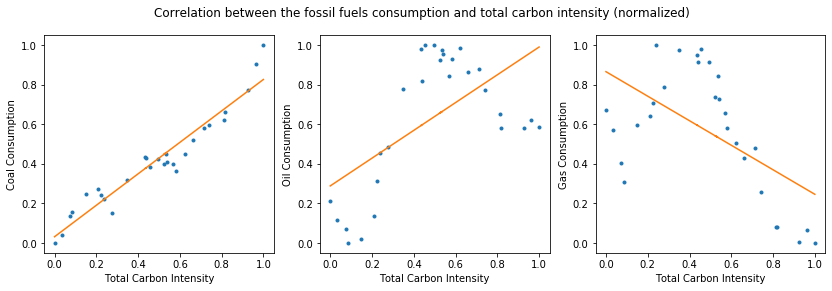

In [74]:
fig = plt.figure(figsize=(14,4))


m, b = np.polyfit(ci_total, coal, 1)
line = list()
for i in ci_total:
    line.append(i*m + b)

plt.subplot(131)
plt.plot(ci_total, coal, '.', ci_total, line, '-')
plt.ylabel("Coal Consumption")
plt.xlabel("Total Carbon Intensity")


m, b = np.polyfit(ci_total, oil, 1)
line = list()
for i in ci_total:
    line.append(i*m + b)

plt.subplot(132)
plt.plot(ci_total, oil, '.', ci_total, line, '-')
plt.ylabel("Oil Consumption")
plt.xlabel("Total Carbon Intensity")


m, b = np.polyfit(ci_total, gas, 1)
line = list()
for i in ci_total:
    line.append(i*m + b)

plt.subplot(133)
plt.plot(ci_total, gas, '.', ci_total, line, '-')
plt.ylabel("Gas Consumption")
plt.xlabel("Total Carbon Intensity")

plt.subplots_adjust( hspace=0.5)
plt.suptitle("Correlation between the fossil fuels consumption and total carbon intensity (normalized)")
plt.savefig("Corr_CI.png")
plt.show()

In [84]:
# Correlation between ponderate estimation of CO2 fossil fuel emissions and total carbon intensity

coal_cons = file_historic_var1["coal_cons"]
oil_cons = file_historic_var1["oil_cons"]
gas_cons = file_historic_var1["gas_cons"]

est_emission = emi_factor.at[0, "mean"]*coal_cons + emi_factor.at[1, "mean"]*oil_cons  + emi_factor.at[2, "mean"]*gas_cons 

# Normalization

em_min = np.amin(est_emission)
em_max = np.amax(est_emission)
emission = (est_emission - em_min)/(em_max - em_min)


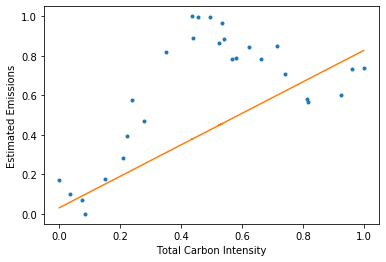

In [87]:
fig = plt.figure()


m, b = np.polyfit(ci_total, coal, 1)
line = list()
for i in ci_total:
    line.append(i*m + b)

plt.plot(ci_total, emission, '.', ci_total, line, '-')
plt.ylabel("Estimated Emissions")
plt.xlabel("Total Carbon Intensity")
plt.savefig("Corr_Emi.png")